The purpose of this Notebook is to interpret data, and tackle certain problems at hand.

Given the CSV file, we will accomplish the following tasks:
1. Describe the relationship between time on page and revenue using statistical analysis and visualization.
2. Determine if the relationship changes if we control for other variables?

In [120]:
import pandas as pd 
import pandas_profiling
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [141]:
df = pd.read_csv('./data/testdata.csv')
df.head()

,revenue,top,browser,platform,site
0,0.007769,30.960273,safari,mobile,3
1,0.014157,9.400584,chrome,desktop,3
2,0.012275,14.119949,safari,desktop,3
3,0.010661,29.907055,chrome,mobile,3
4,0.009473,19.363226,chrome,mobile,3


In [222]:
df.head()

,revenue,top,browser,platform,site
0,0.007769,30.960273,1,1,3
1,0.014157,9.400584,0,0,3
2,0.012275,14.119949,1,1,3
3,0.010661,29.907055,0,0,3
4,0.009473,19.363226,0,0,3


In [221]:
df['browser'] = df['browser'].astype('category').cat.codes
df['platform'] = df['browser'].astype('category').cat.codes

# Data Insights

In [33]:
df.shape 

(4000, 5)

* The dataset comprises of 4000 observations and 5 chracteriestics


In [34]:
df.columns.values 

array(['revenue', 'top', 'browser', 'platform', 'site'], dtype=object)

* Label of each column

In [35]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
revenue     4000 non-null float64
top         4000 non-null float64
browser     4000 non-null object
platform    4000 non-null object
site        4000 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 156.3+ KB


* No variable column has null/missing values

# Summary Statistics

In [36]:
df.describe() 

,revenue,top,site
count,4000.000000,4000.000000,4000.000000
mean,0.009720,11.333947,2.365000
std,0.002602,7.424385,0.870037
min,0.003008,0.276534,1.000000
25%,0.007697,5.634530,2.000000
50%,0.009580,9.761473,2.000000
75%,0.011784,15.723710,3.000000
max,0.016480,57.501862,4.000000


# Key Observations -

* The mean value is grater than median value of each column represented by 50%(50th percentile) in index column.

# Data Visualization

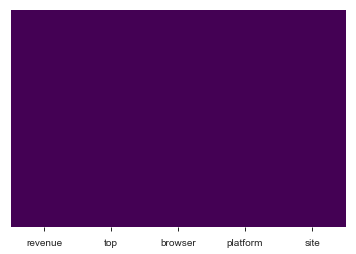

In [37]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

* Dataset has no missing values.
* If there were any, you would've noticed in figure represented by different colour shade on purple background.

# To check correlation

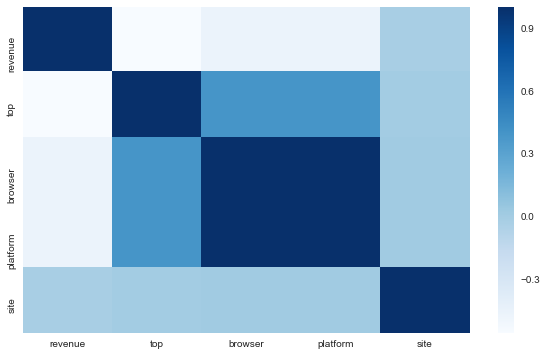

In [232]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

Dark shades represents positive correlation while lighter shades represents negative correlation.

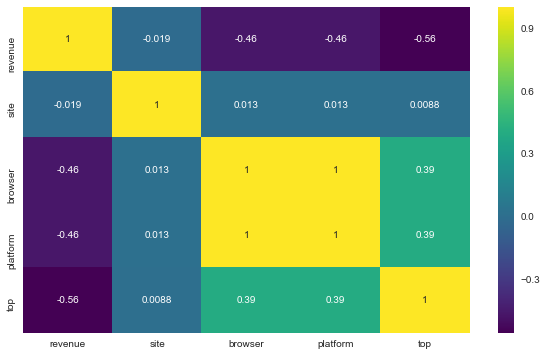

In [231]:
#Quality correlation matrix
k = 5 #number of variables for heatmap
cols = df.corr().nlargest(k, 'revenue')['revenue'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

#### Relationship between time on page and revenue

Revenue vs Top has a Correlation of -0.56; which mean they have a moderate downhill (negative) relationship.

* Exactly –1. A perfect downhill (negative) linear relationship
* –0.70. A strong downhill (negative) linear relationship
* –0.50. A moderate downhill (negative) relationship
* –0.30. A weak downhill (negative) linear relationship
* 0. No linear relationship
* +0.30. A weak uphill (positive) linear relationship
* +0.50. A moderate uphill (positive) relationship
* +0.70. A strong uphill (positive) linear relationship
* Exactly +1. A perfect uphill (positive) linear relationship

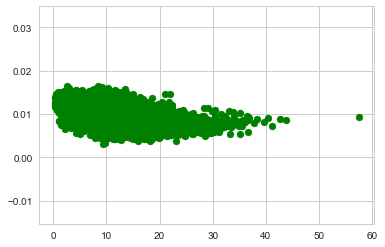

In [211]:
plt.scatter(df['top'], df['revenue'],color='g')
plt.show()

In [246]:
df[['top', 'site', 'platform','revenue','browser']].corr()

,top,site,platform,revenue,browser
top,1.000000,0.008772,0.393912,-0.555306,0.393912
site,0.008772,1.000000,0.012645,-0.019237,0.012645
platform,0.393912,0.012645,1.000000,-0.459404,1.000000
revenue,-0.555306,-0.019237,-0.459404,1.000000,-0.459404
browser,0.393912,0.012645,1.000000,-0.459404,1.000000


# Machine Learning Modeling

In [237]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#df = df[df['top'] < 50]

x = df[['top','site','platform']].values
y = df[['revenue']].values

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

### Random Forest Regression 

In [238]:
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor

# 1. Set up the model
model = RandomForestRegressor()

# 2. Fit the model 
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [239]:
y_pred = model.predict(X_test)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse1))

RMSE: 0.002251


In [244]:
#plt.scatter(X_test, y_test,color='g')
#plt.plot(X_test, model.predict(X_test),color='k')

#plt.show()

### XGboost Regression 

In [241]:
from sklearn.ensemble import RandomForestRegressor
import xgboost
n_estimators=100

# 1. Set up the model 
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

# 2. Fit the model 
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [242]:
y_pred = xgb.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse2))

RMSE: 0.001943


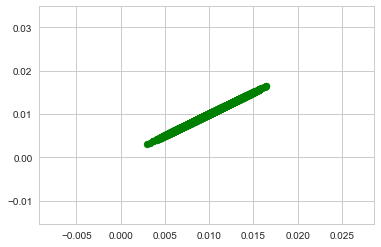

In [243]:
plt.scatter(X, y,color='g')
#plt.plot(X_test, xgb.predict(X_test),color='k')

plt.show()